In [4]:
import ruamel.yaml as yaml
import os
import sys
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split

NO_CONFIG_ERR_MSG = """No config file found. Root directory is determined by presence of "config.yaml" file."""

original_wd = os.getcwd()

# Number of times to move back in directory
num_retries = 10
for x in range(0, num_retries):
    # try to load config file
    try:
        with open("config.yaml", 'r') as stream:
            cfg = yaml.safe_load(stream)
    # If not found move back one directory level
    except FileNotFoundError:
        os.chdir('../')
        # If reached the max number of directory levels change to original wd and print error msg
        if x+1 == num_retries:
            os.chdir(original_wd)
            print(NO_CONFIG_ERR_MSG)

# Add directory to PATH
path = os.getcwd()

if path not in sys.path:
    sys.path.append(path)


## Load and Process Data

In [5]:
df = pd.read_csv('data/processed/modelling_data_dropped_null_wins.csv')

## Fit Model

In [6]:
df.head()

,Season_2014-15,Season_2015-16,Season_2016-17,Season_2017-18,Day_Of_WeekFri,Day_Of_WeekMon,Day_Of_WeekSat,Day_Of_WeekSun,Day_Of_WeekThu,Day_Of_WeekTue,...,player8_WINS,player8_RPM,player8_DRPM,player8_ORPM,player8_WINS_portion,player8_RPM_portion,Tot_WINS,Tot_RPM,Ticket_Value,TV_Rate
0,0,0,1,0,0,0,0,0,1,0,...,2.67,-0.60,-0.46,-0.14,0.000927,-0.000208,0.004895,-0.000510,0.671432,5.288334
1,0,0,1,0,0,0,0,0,1,0,...,0.05,-3.02,-0.06,-2.96,0.000016,-0.000968,0.006687,-0.008436,0.697920,5.698246
2,0,0,1,0,1,0,0,0,0,0,...,4.06,0.13,-1.23,1.36,0.001208,0.000039,0.005304,-0.000855,0.725555,4.477193
3,0,0,1,0,1,0,0,0,0,0,...,0.98,-0.26,0.13,-0.39,0.000204,-0.000054,0.006790,-0.011398,0.463623,3.068853
4,0,0,1,0,1,0,0,0,0,0,...,2.40,-0.68,-1.24,0.56,0.000833,-0.000236,0.006875,-0.001303,0.759319,4.683684


In [7]:
X = df.drop(columns=['Ticket_Value', 'TV_Rate'])
Y = df['Ticket_Value']

In [8]:
best_params = {'subsample': 0.8,
 'silent': 1,
 'seed': 42,
 'nthread': 4,
 'n_estimators': 500,
 'missing': -999,
 'min_child_weight': 11,
 'max_depth': 2,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

In [9]:
%%time
xgb_model = xgb.XGBRegressor(**best_params)

xgb_model.fit(X, Y)

Wall time: 2.18 s


## XGB modelled feature importance

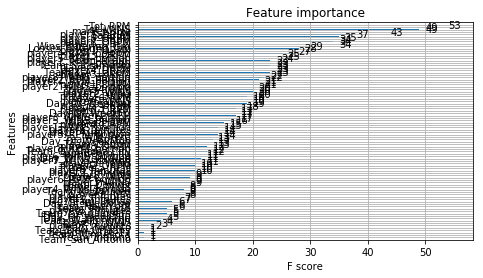

In [10]:
xgb.plot_importance(xgb_model)

## Shapley Values

In [11]:
%%time
# load JS visualization code to notebook
shap.initjs()
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])

Wall time: 467 ms


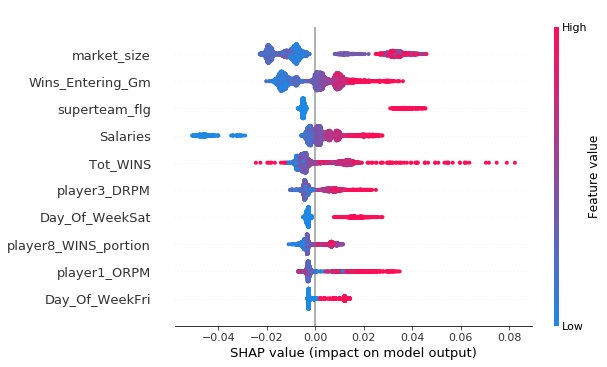

In [13]:
# %%time
# # summarize the effects of all the features
shap.summary_plot(shap_values, X, max_display=10)

#### X axis is index (instance of team and season)

#### y is the team value

#### Red/Blue are the direction the value is 'pushed' by its feature value

In [2]:
# # visualize the training set predictions
# shap.force_plot(explainer.expected_value, shap_values, X)

## Single Effect

#### X axis is feature value

#### y is the associated shapley value (ouput impact)

#### Red/Blue is a value of potential interaction effect

Season_2014-15


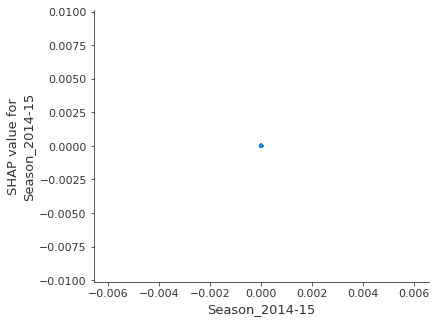

Season_2015-16


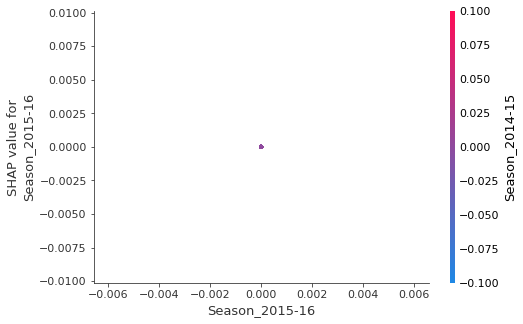

Season_2016-17


C:\Users\afurrier\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\afurrier\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


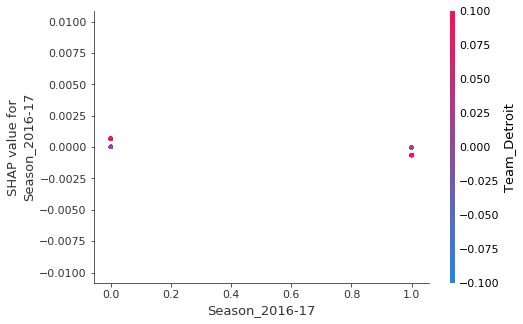

Season_2017-18


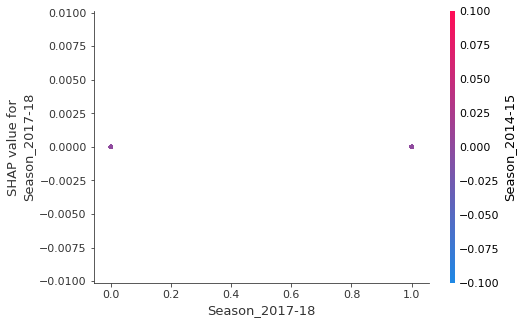

Day_Of_WeekFri


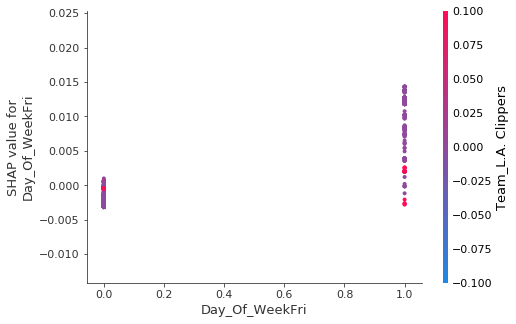

Day_Of_WeekMon


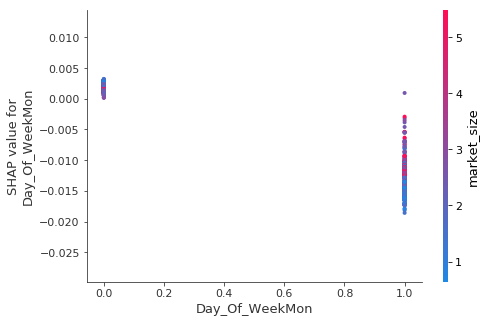

Day_Of_WeekSat


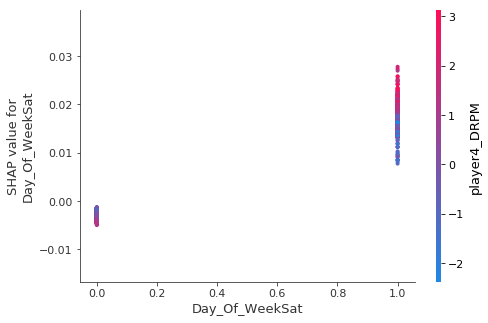

Day_Of_WeekSun


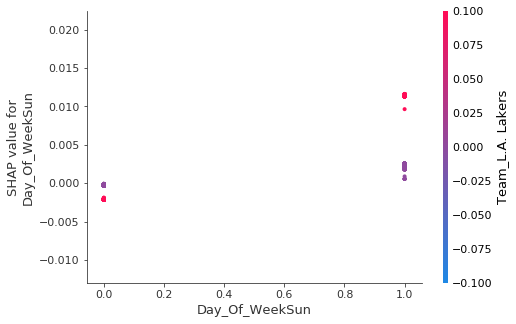

Day_Of_WeekThu


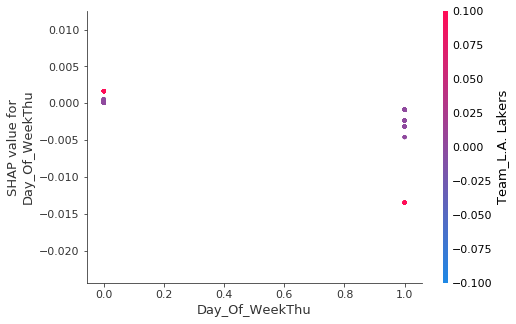

Day_Of_WeekTue


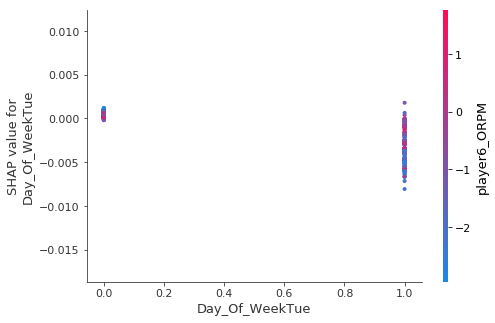

Day_Of_WeekWed


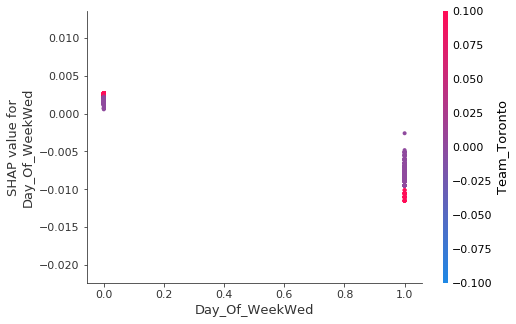

Team_Atlanta


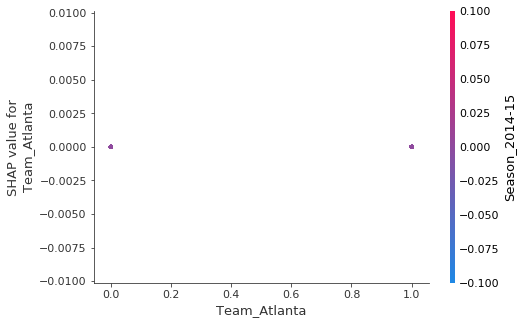

Team_Boston


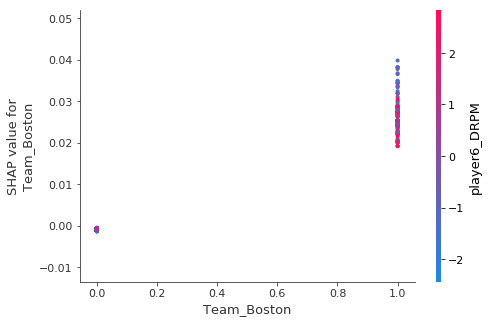

Team_Brooklyn


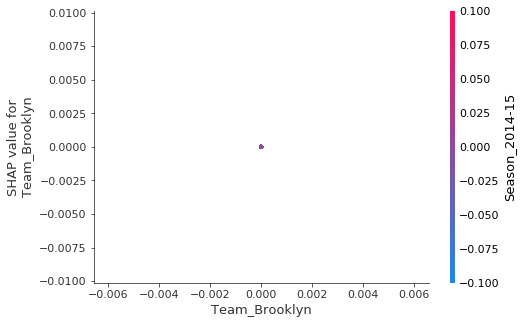

Team_Charlotte


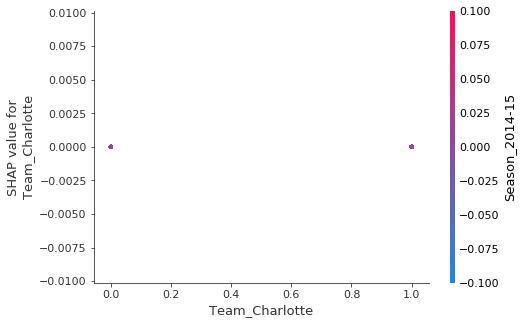

Team_Chicago


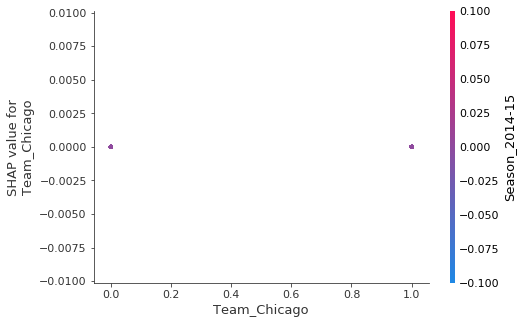

Team_Cleveland


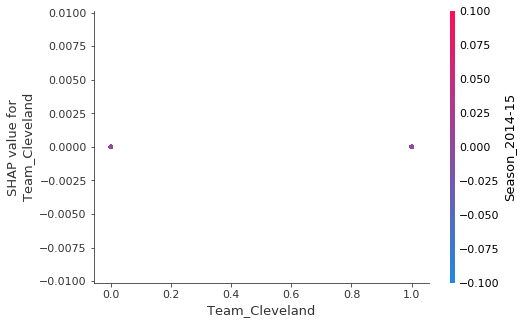

Team_Dallas


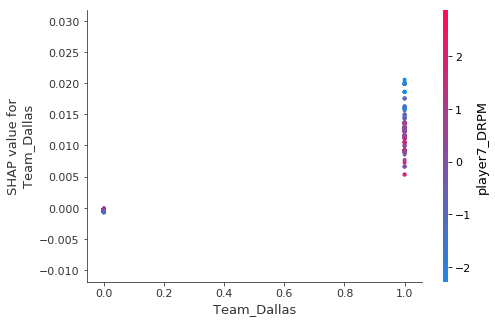

Team_Denver


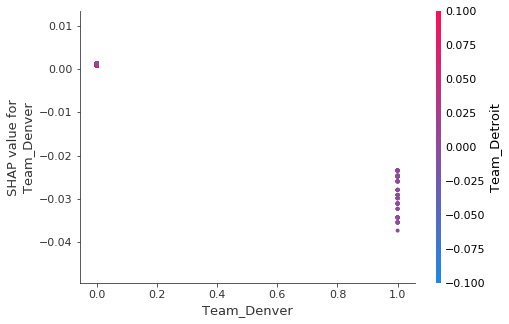

Team_Detroit


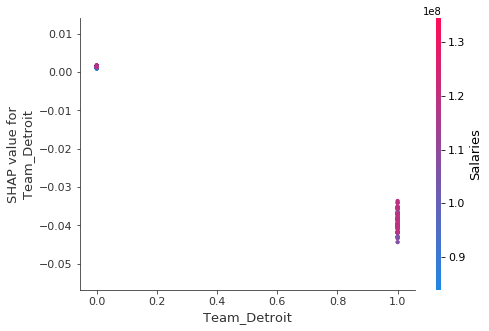

Team_Golden State


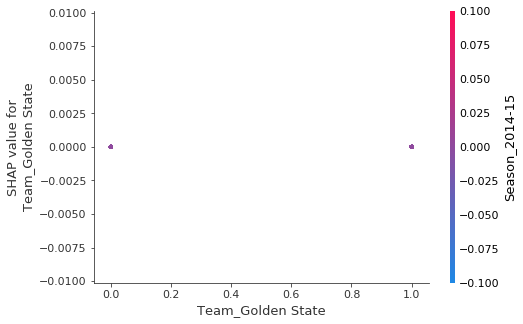

Team_Houston


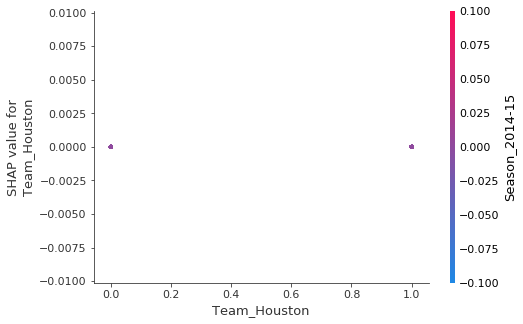

Team_Indiana


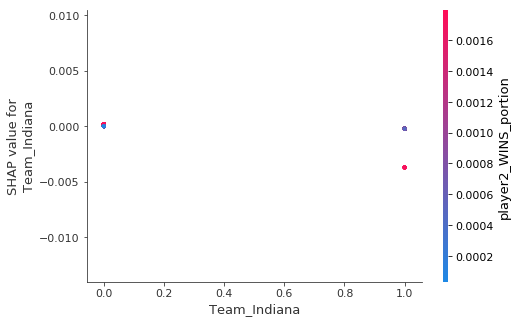

Team_L.A. Clippers


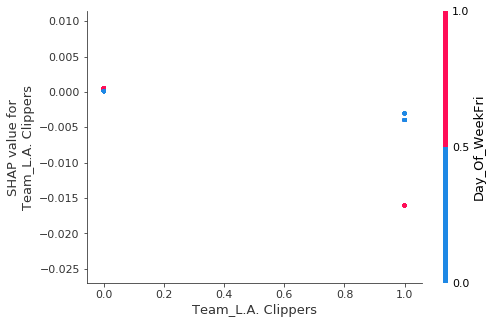

Team_L.A. Lakers


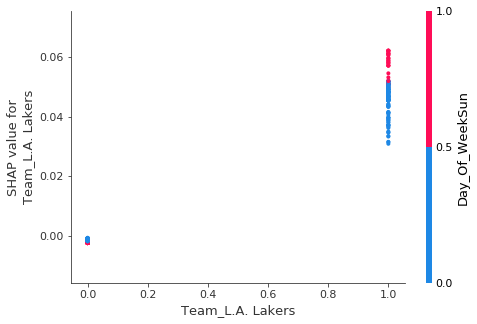

Team_Memphis


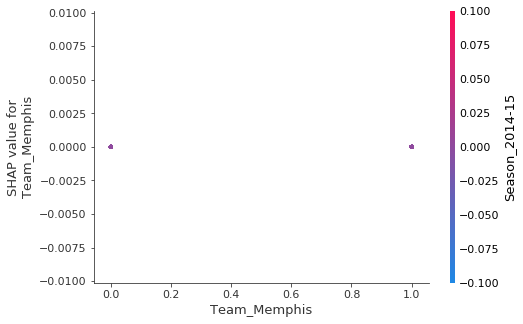

Team_Miami


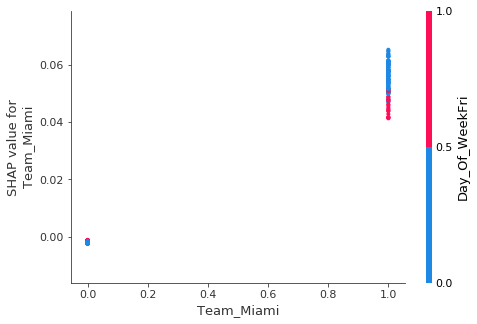

Team_Milwaukee


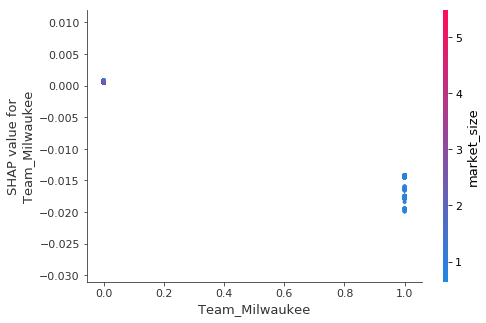

Team_Minnesota


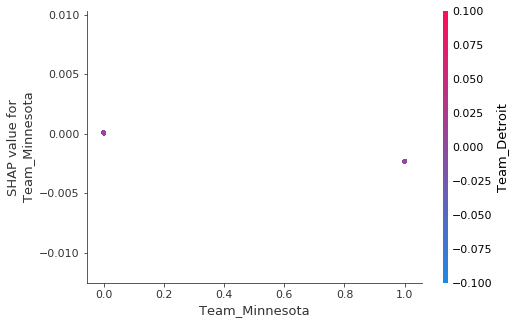

Team_New Orleans


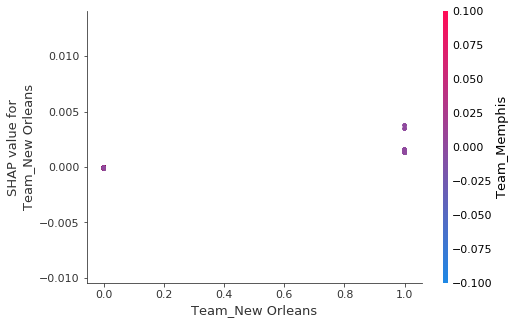

Team_New York


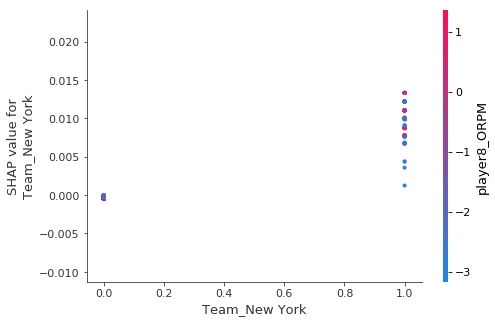

Team_Oklahoma City


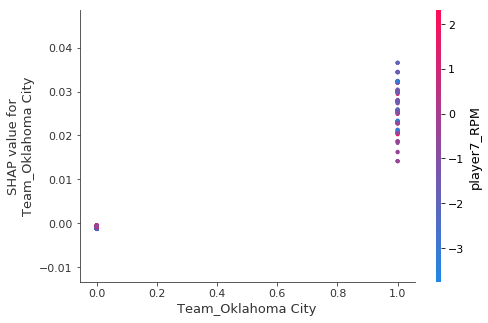

Team_Orlando


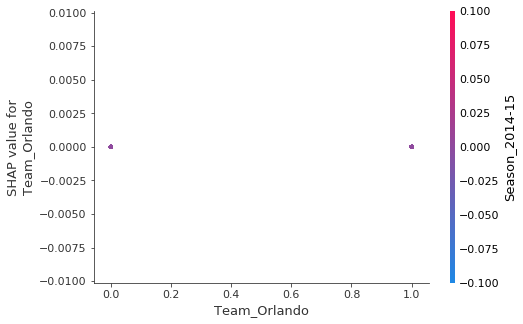

Team_Philadelphia


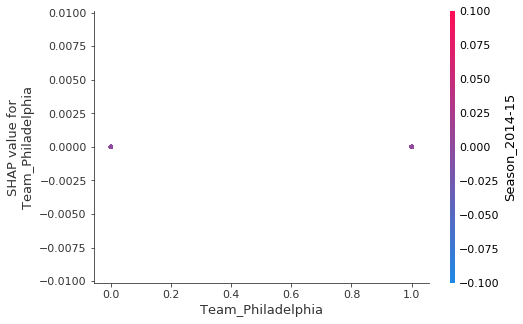

Team_Phoenix


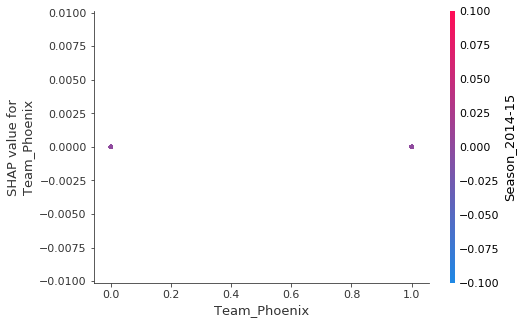

Team_Portland


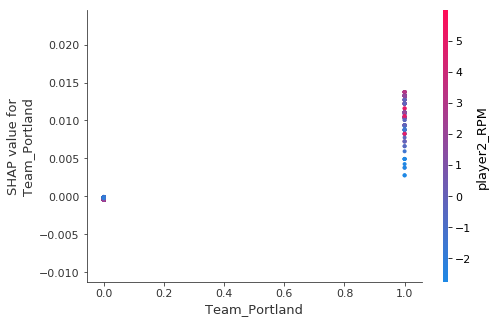

Team_Sacramento


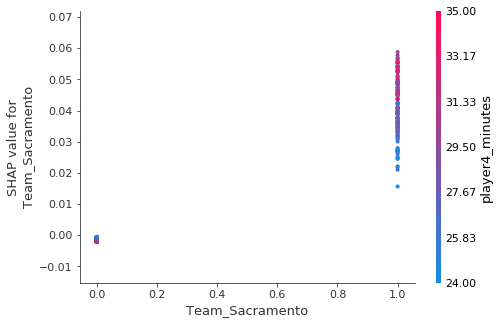

Team_San Antonio


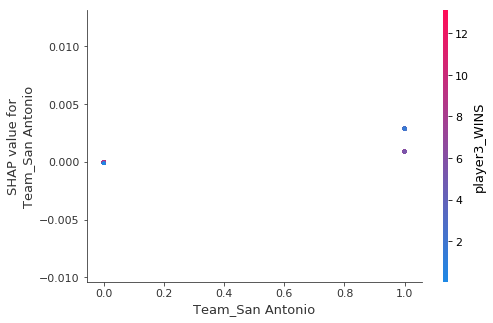

Team_Toronto


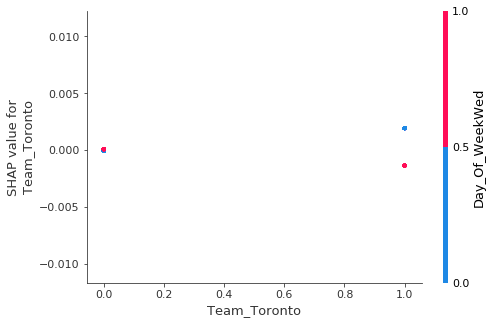

Team_Utah


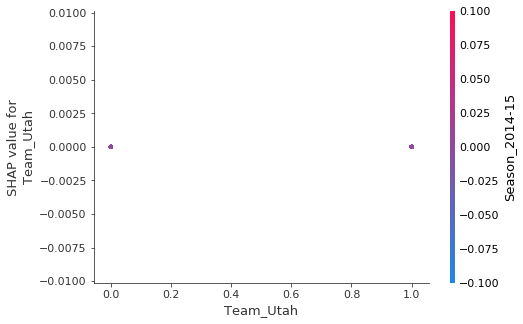

Team_Washington


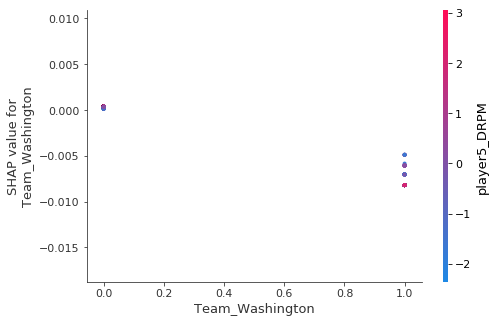

market_size


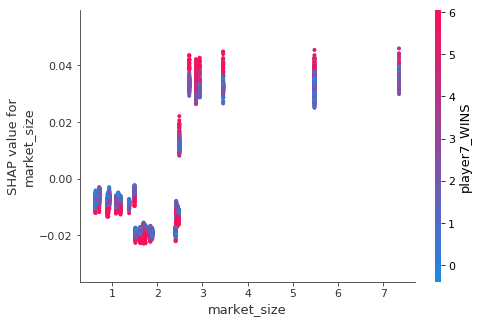

Salaries


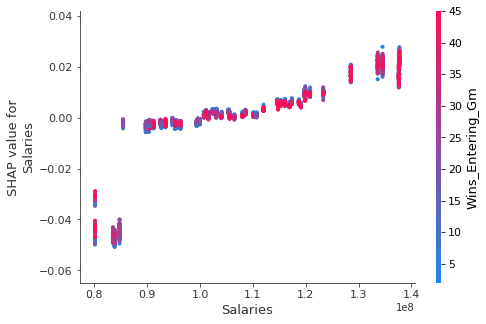

Wins_Entering_Gm


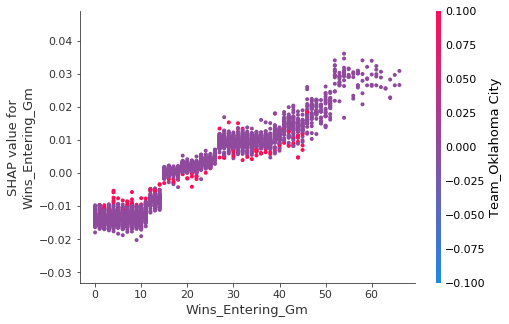

Losses_Entering_Gm


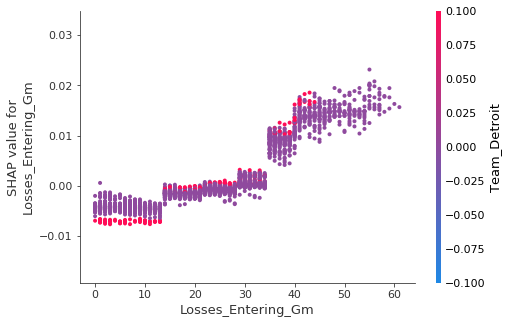

WIN_Perc


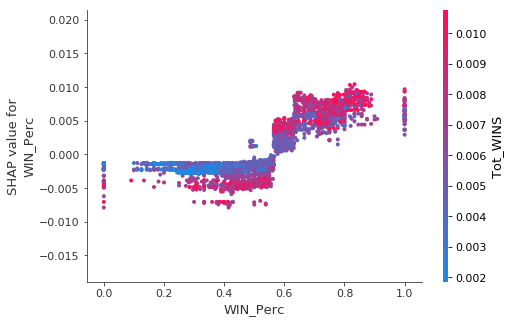

superteam_flg


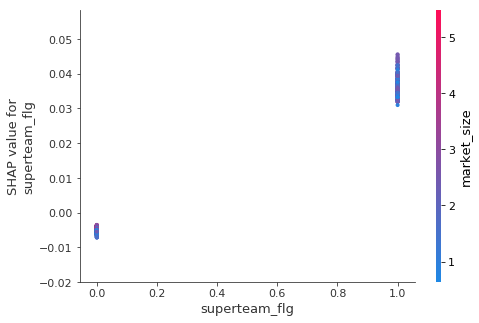

player1_minutes


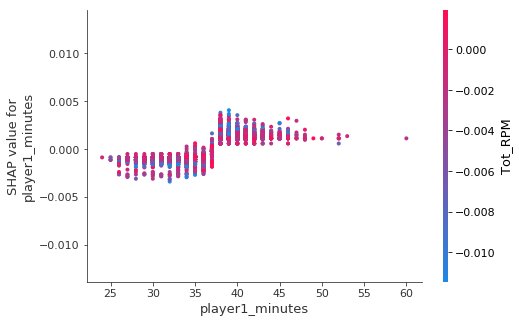

player1_WINS


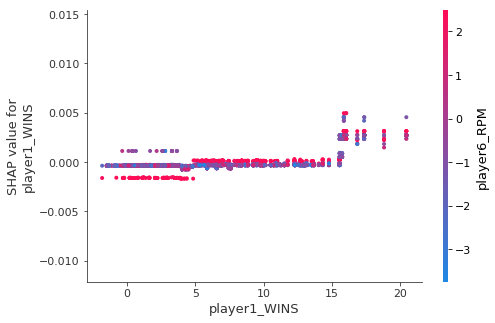

player1_RPM


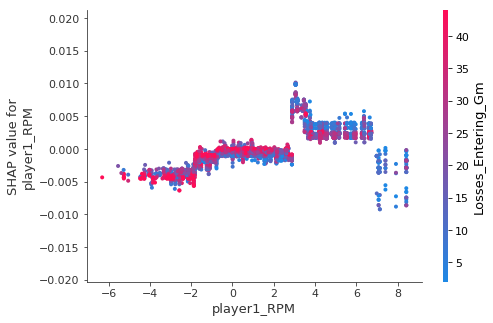

player1_DRPM


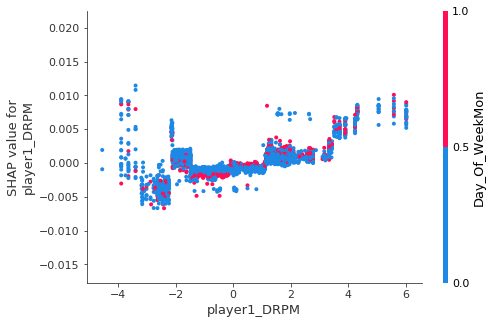

player1_ORPM


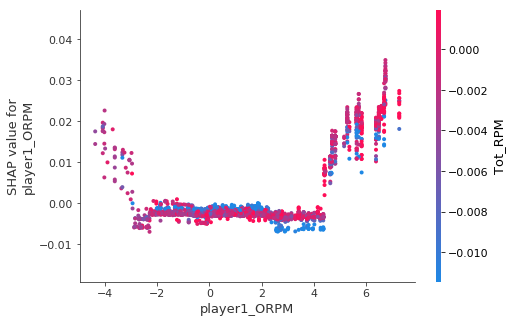

player1_WINS_portion


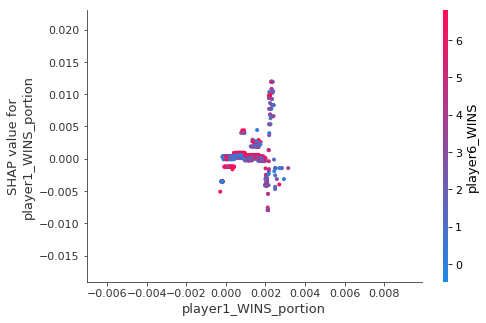

player1_RPM_portion


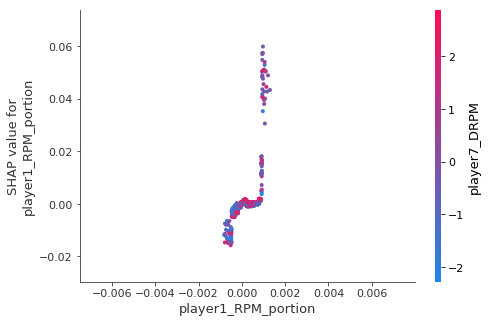

player2_minutes


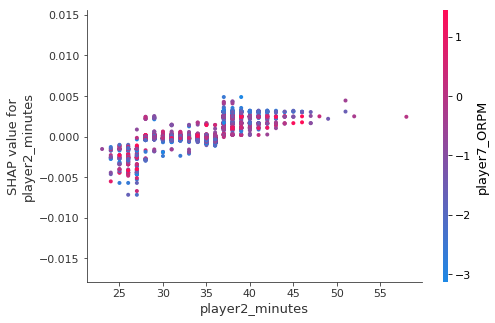

player2_WINS


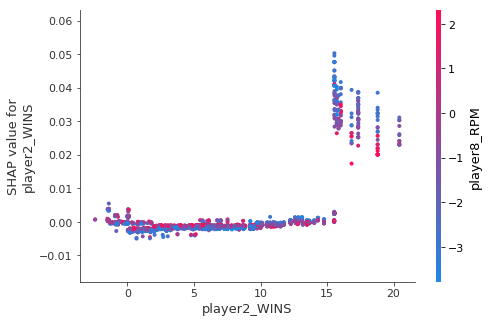

player2_RPM


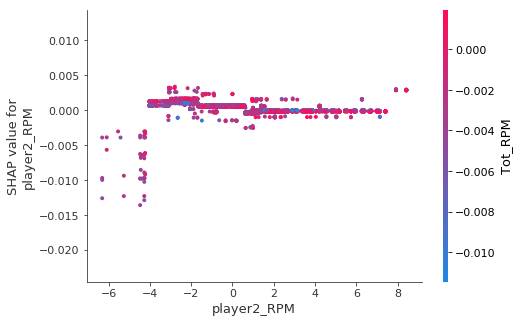

player2_DRPM


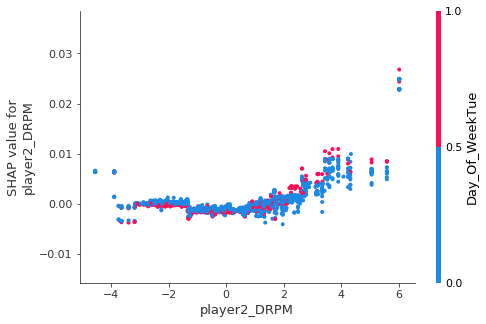

player2_ORPM


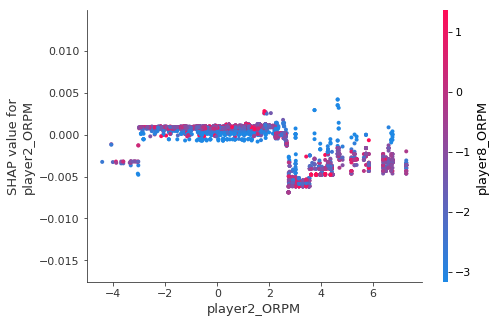

player2_WINS_portion


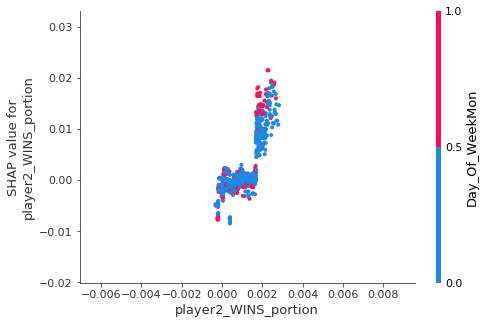

player2_RPM_portion


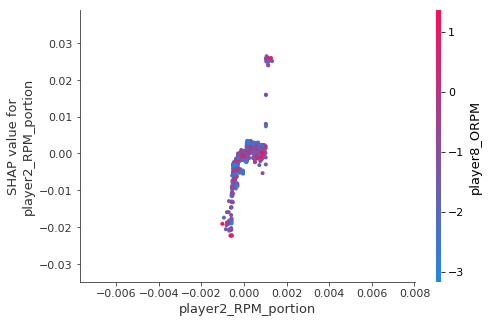

player3_minutes


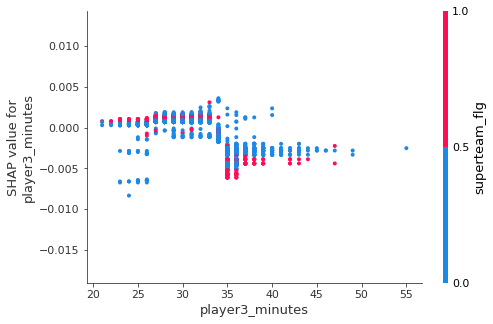

player3_WINS


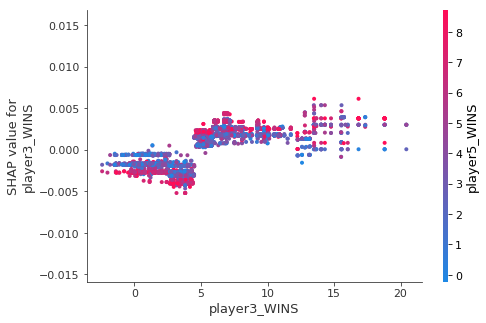

player3_RPM


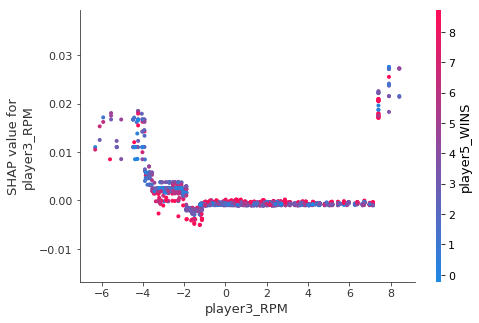

player3_DRPM


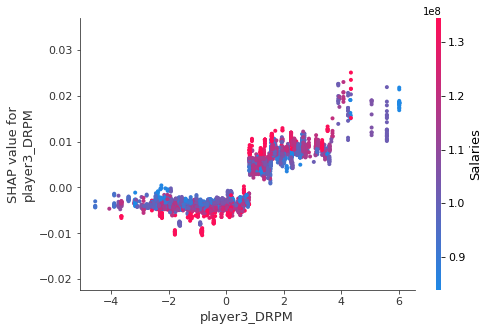

player3_ORPM


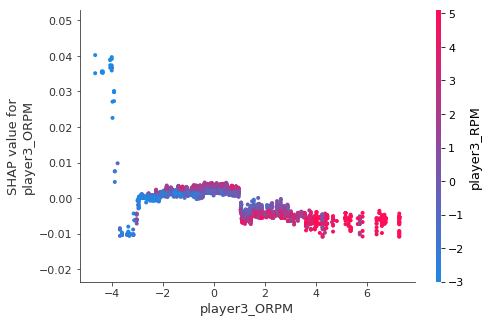

player3_WINS_portion


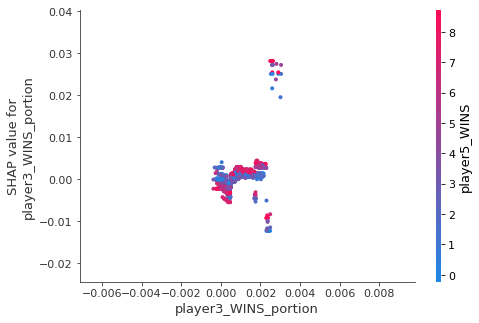

player3_RPM_portion


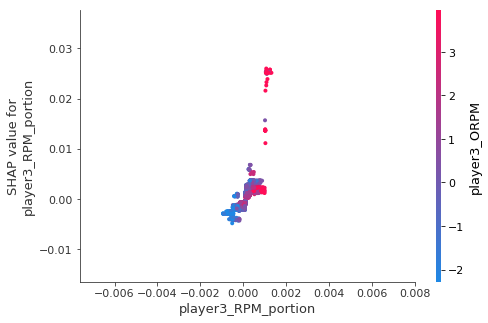

player4_minutes


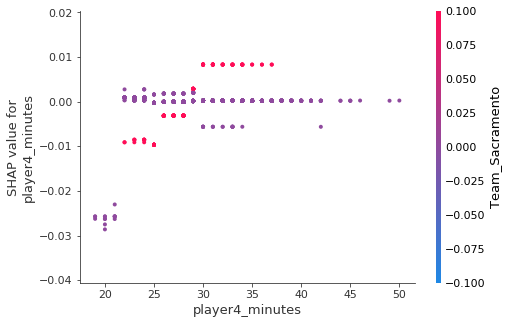

player4_WINS


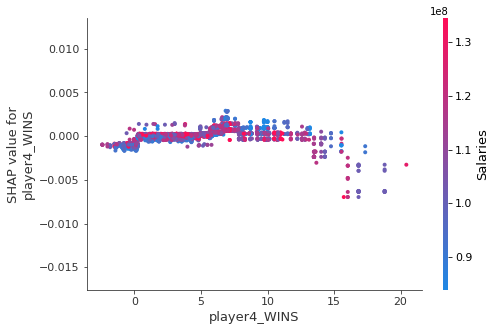

player4_RPM


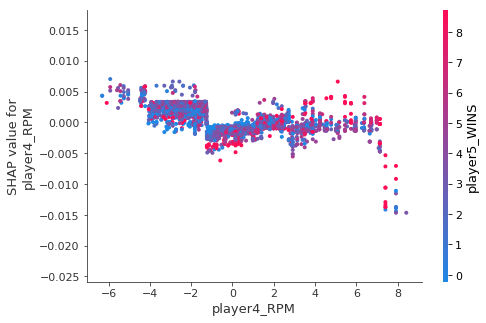

player4_DRPM


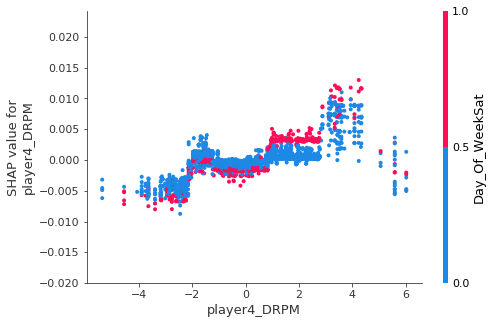

player4_ORPM


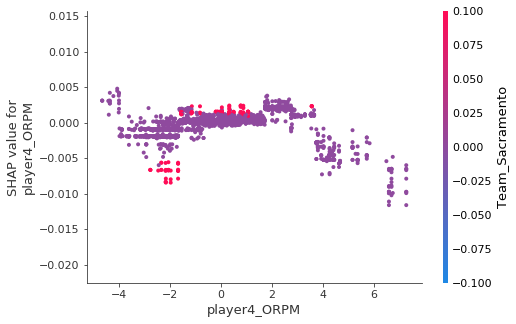

player4_WINS_portion


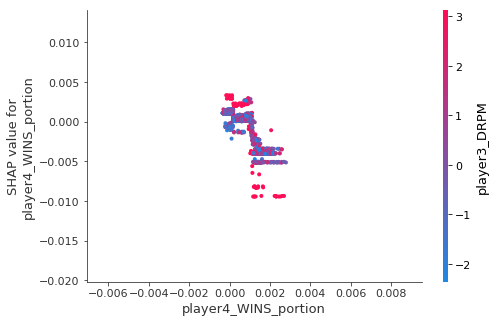

player4_RPM_portion


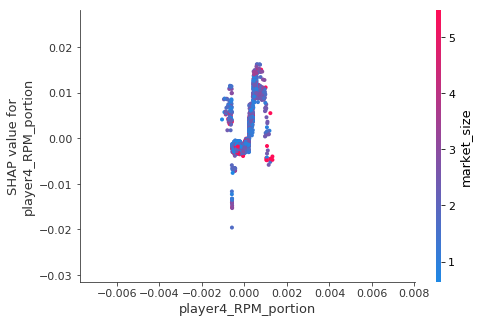

player5_minutes


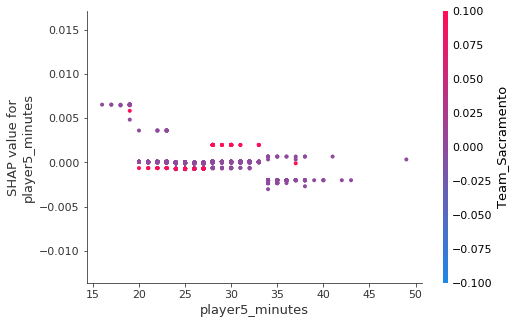

player5_WINS


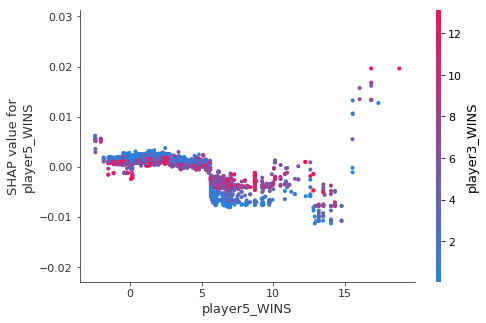

player5_RPM


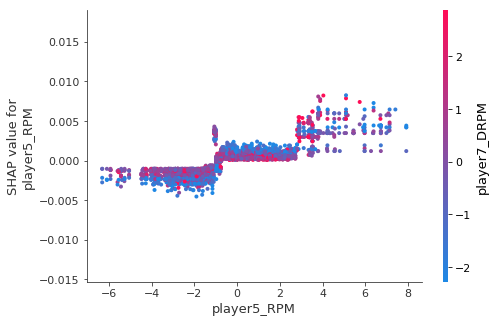

player5_DRPM


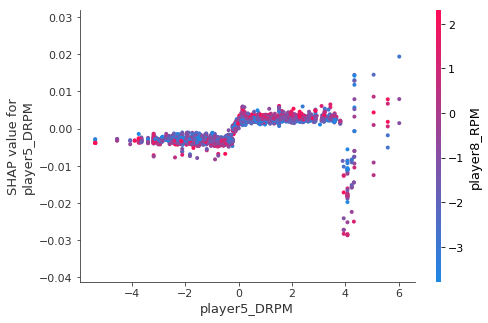

player5_ORPM


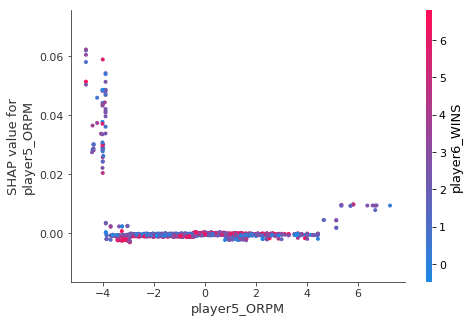

player5_WINS_portion


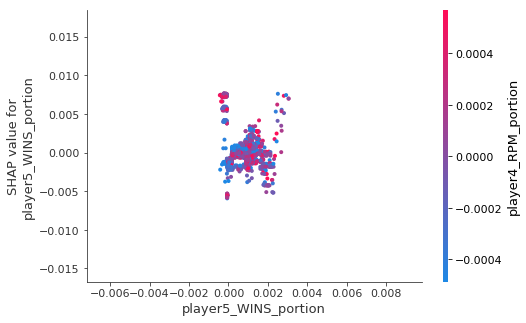

player5_RPM_portion


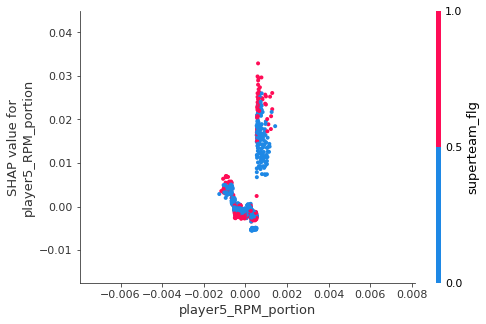

player6_minutes


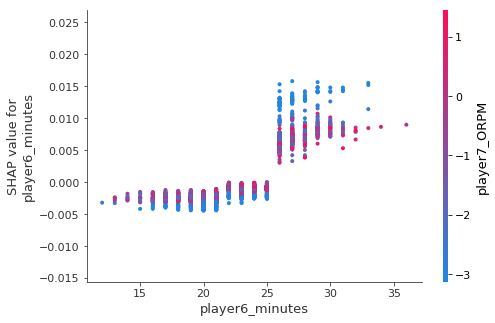

player6_WINS


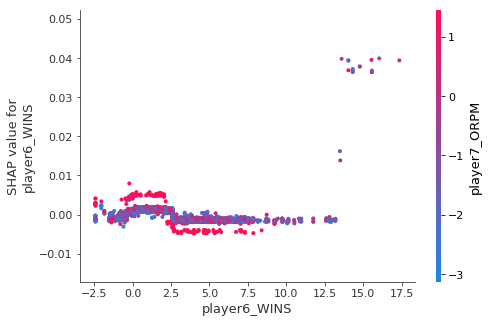

player6_RPM


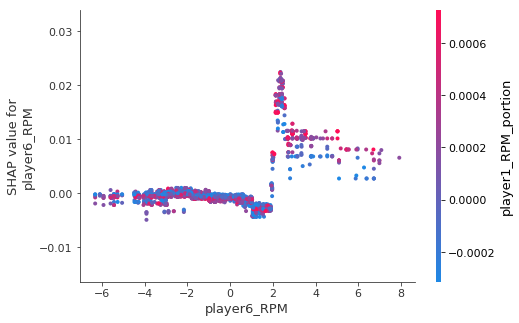

player6_DRPM


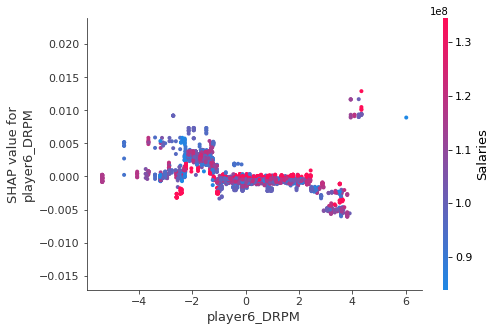

player6_ORPM


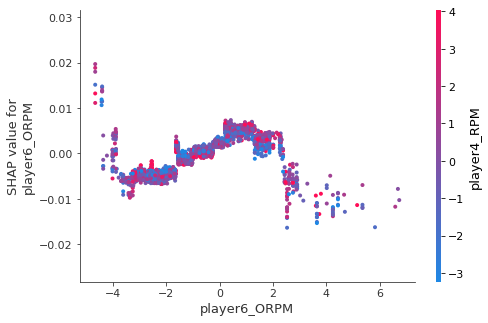

player6_WINS_portion


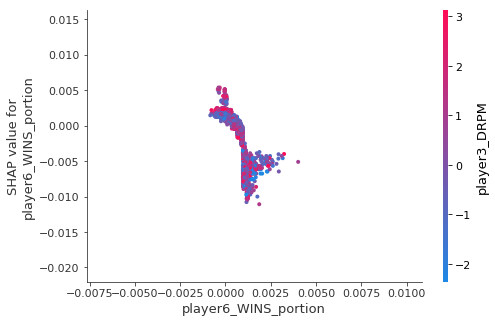

player6_RPM_portion


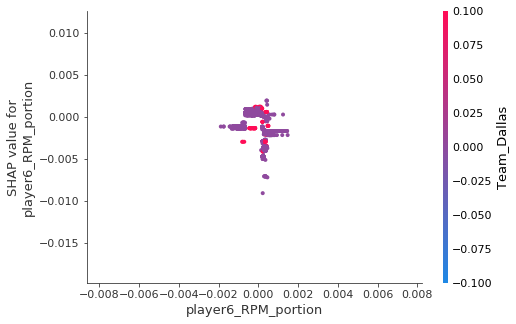

player7_minutes


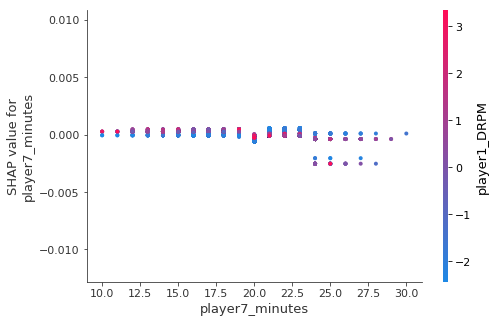

player7_WINS


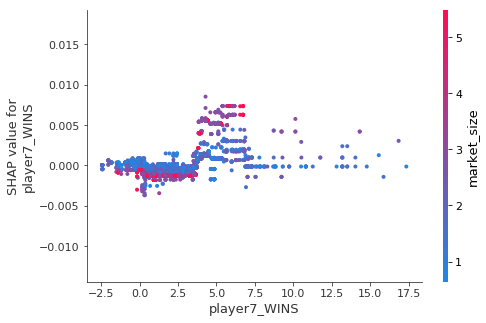

player7_RPM


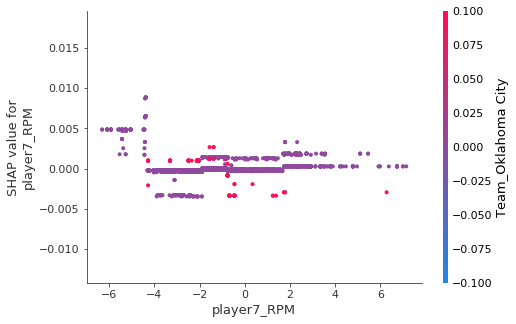

player7_DRPM


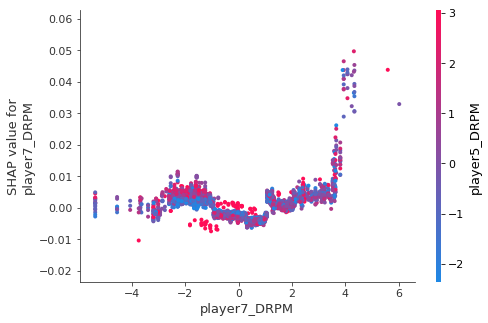

player7_ORPM


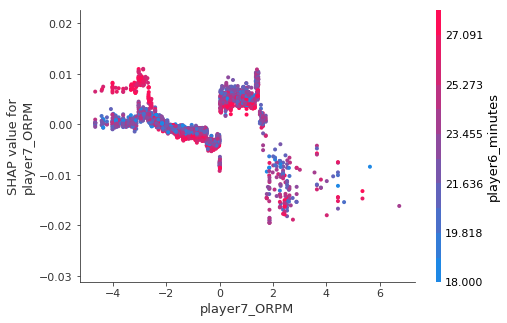

player7_WINS_portion


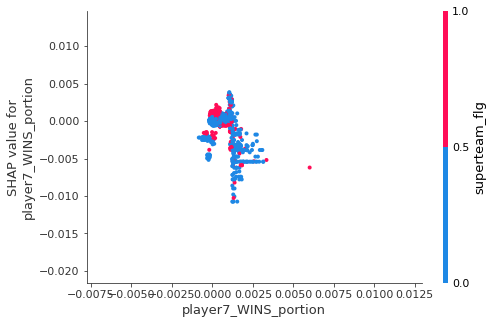

player7_RPM_portion


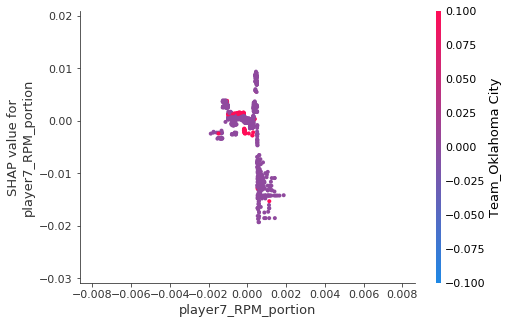

player8_minutes


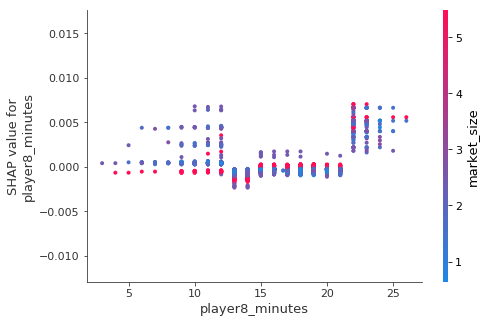

player8_WINS


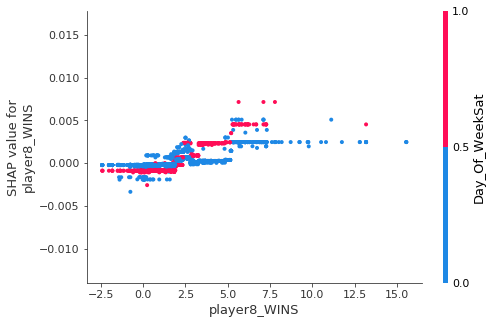

player8_RPM


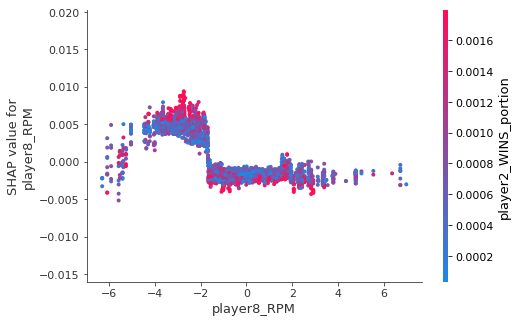

player8_DRPM


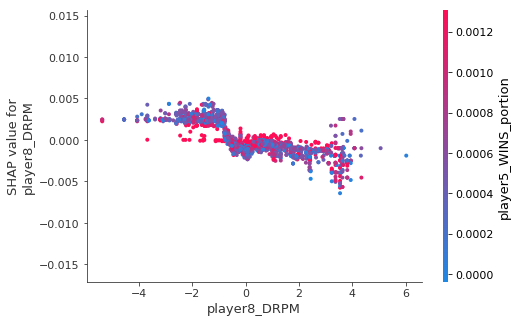

player8_ORPM


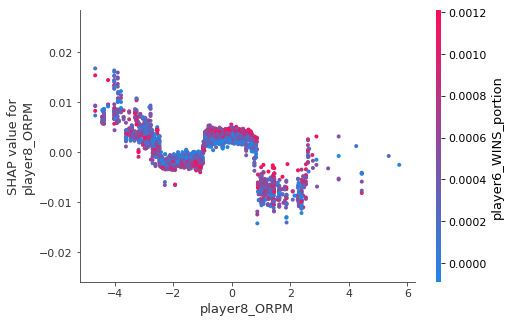

player8_WINS_portion


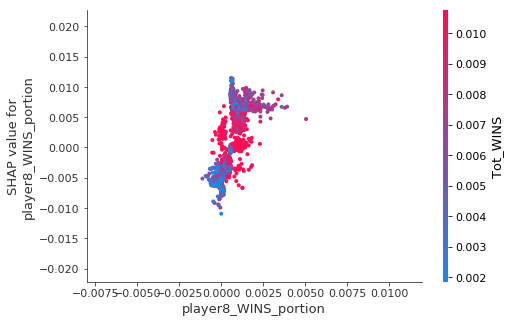

player8_RPM_portion


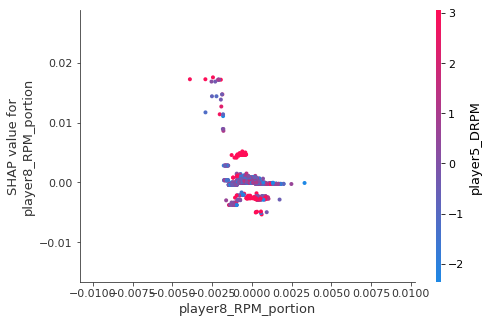

Tot_WINS


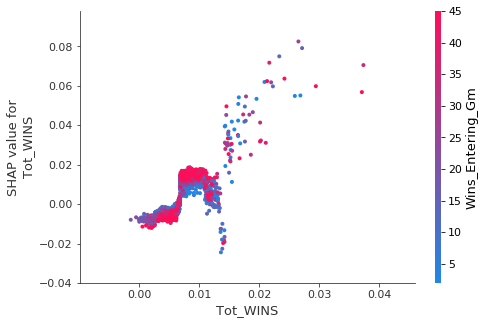

Tot_RPM


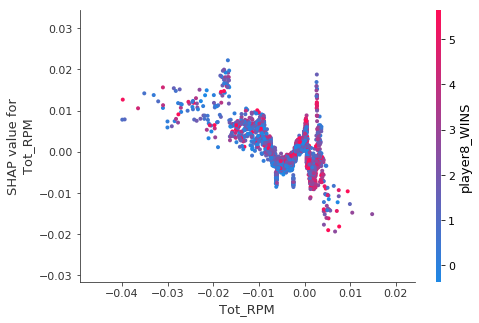

In [22]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
for feature in X.columns.values.tolist():
    print(feature)
    shap.dependence_plot(feature, shap_values, X)

## Which features are cumulatively most important?

Avg(Abs Value of Features Shapley Values)

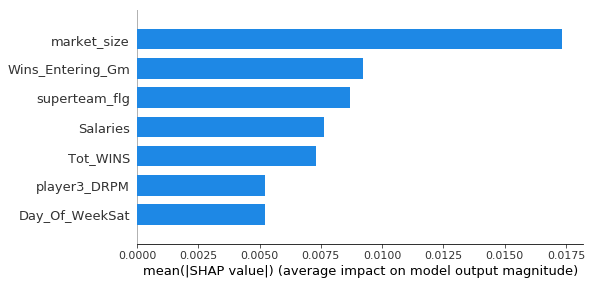

In [14]:
shap.summary_plot(shap_values, X, plot_type="bar", max_display=7)

## Partial Dependence Plots

In [24]:
from sklearn.ensemble.partial_dependence import partial_dependence

In [ ]:
xgb_model

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_best_params =  {'subsample': 0.8,
 'n_estimators': 500,
 'min_child_weight': 11,
 'max_depth': 2,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}
gbr = GradientBoostingRegressor(**gbr_best_params)
gbr.fit(X, Y)

TypeError: __init__() got an unexpected keyword argument 'min_child_weight'

In [30]:
partial_dependence(gbr, Y.values, X )
# X = df.drop(columns=['Ticket_Value', 'TV_Rate'])
# Y = df['Ticket_Value']

NameError: name 'gbr' is not defined